The goal of this work is to predict whether a certain passenger survived the Titanic Disaster. 
The dataset can be found on https://www.kaggle.com/competitions/titanic/overview/evaluation .

Let's dig in!


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head(n=20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


The information we're given to work with are as seen above, those unobvious ones being: 

<b>Pclass</b> meaning ticket class (1 - first class)

<b>SibSp</b> meaning number of siblings/spouses aboard the Titanic

<b>Parch</b> meaning number of parents on the Titanic

<b>Embarked</b> meaning port of embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

I will start by dropping useless data and getting some cleaning done.

Data I consider irrelevant in this set are columns Name, Ticket type and Cabin. The last one could potentially be very useful,
however most values are missing - far more than half of them - so using this data is a bad idea.

In [2]:
titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

# Filling NaN values in age with the median of the rest of non NaN values 
titanic_df['Age'] = titanic_df['Age'].fillna(value=int(titanic_df.loc[titanic_df['Age'].notnull()]['Age'].median()))

# Encoding port of embarkation with a number as follows: C - 0, Q  - 1, S - 2
titanic_df.loc[titanic_df['Embarked'] == 'S', 'Embarked'] = 2
titanic_df.loc[titanic_df['Embarked'] == 'Q', 'Embarked'] = 1
titanic_df.loc[titanic_df['Embarked'] == 'C', 'Embarked'] = 0
titanic_df.dropna(inplace=True)

# Similar for gender : 1 being female and 0 being male
titanic_df.loc[titanic_df['Sex'] == 'female', 'Sex'] = 1
titanic_df.loc[titanic_df['Sex'] == 'male', 'Sex'] = 0

titanic_df.head(n=10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2
1,2,1,1,1,38.0,1,0,71.2833,0
2,3,1,3,1,26.0,0,0,7.9250,2
3,4,1,1,1,35.0,1,0,53.1000,2
4,5,0,3,0,35.0,0,0,8.0500,2
5,6,0,3,0,28.0,0,0,8.4583,1
6,7,0,1,0,54.0,0,0,51.8625,2
7,8,0,3,0,2.0,3,1,21.0750,2
8,9,1,3,1,27.0,0,2,11.1333,2
9,10,1,2,1,14.0,1,0,30.0708,0


Before diving into classification, it would be nice to get to know the data we are analyzing better. This would allows us to
gain some intuition as to what we are dealing with.

The most interesting informations seems to be the gender structure of our passengers, their age structure, how many of them 
actually survived and how many of them travelled in each class.

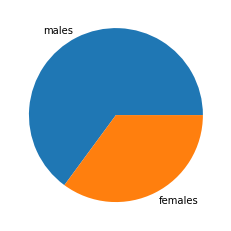

In [3]:
males, females = titanic_df['Sex'].value_counts()
plt.pie((males, females), labels=['males', 'females']);

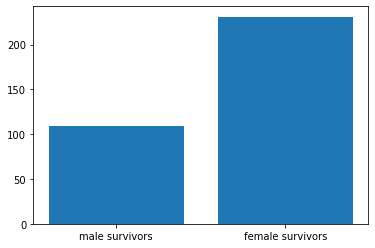

In [4]:
male_survivors = titanic_df[(titanic_df['Sex'] == 0) & (titanic_df['Survived'] == 1)]
female_survivors = titanic_df[(titanic_df['Sex'] == 1) & (titanic_df['Survived'] == 1)]
plt.bar(x=['male survivors', 'female survivors'], height=[len(male_survivors), len(female_survivors)]);

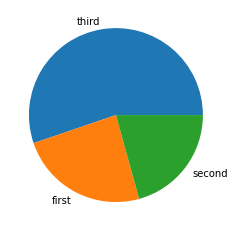

In [5]:
third, first, second = titanic_df['Pclass'].value_counts()
plt.pie((third, first, second), labels=['third', 'first', 'second']);

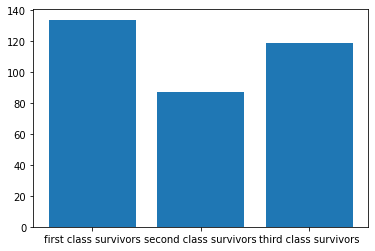

In [6]:
third_class_survivors = titanic_df[(titanic_df['Pclass'] == 3) & (titanic_df['Survived'] == 1)]
second_class_survivors = titanic_df[(titanic_df['Pclass'] == 2) & (titanic_df['Survived'] == 1)]
first_class_survivors = titanic_df[(titanic_df['Pclass'] == 1) & (titanic_df['Survived'] == 1)]
plt.bar(x=['first class survivors', 'second class survivors', 'third class survivors'], height=[len(first_class_survivors), len(second_class_survivors), len(third_class_survivors)]);

Two very important observations: women were much more likely to survive the disaster, even though they were the minority of the passengers and people who purchased first class tickets were also relativly likely to surviver - even though they are the smallest group, they make up for the largest part of the survivors

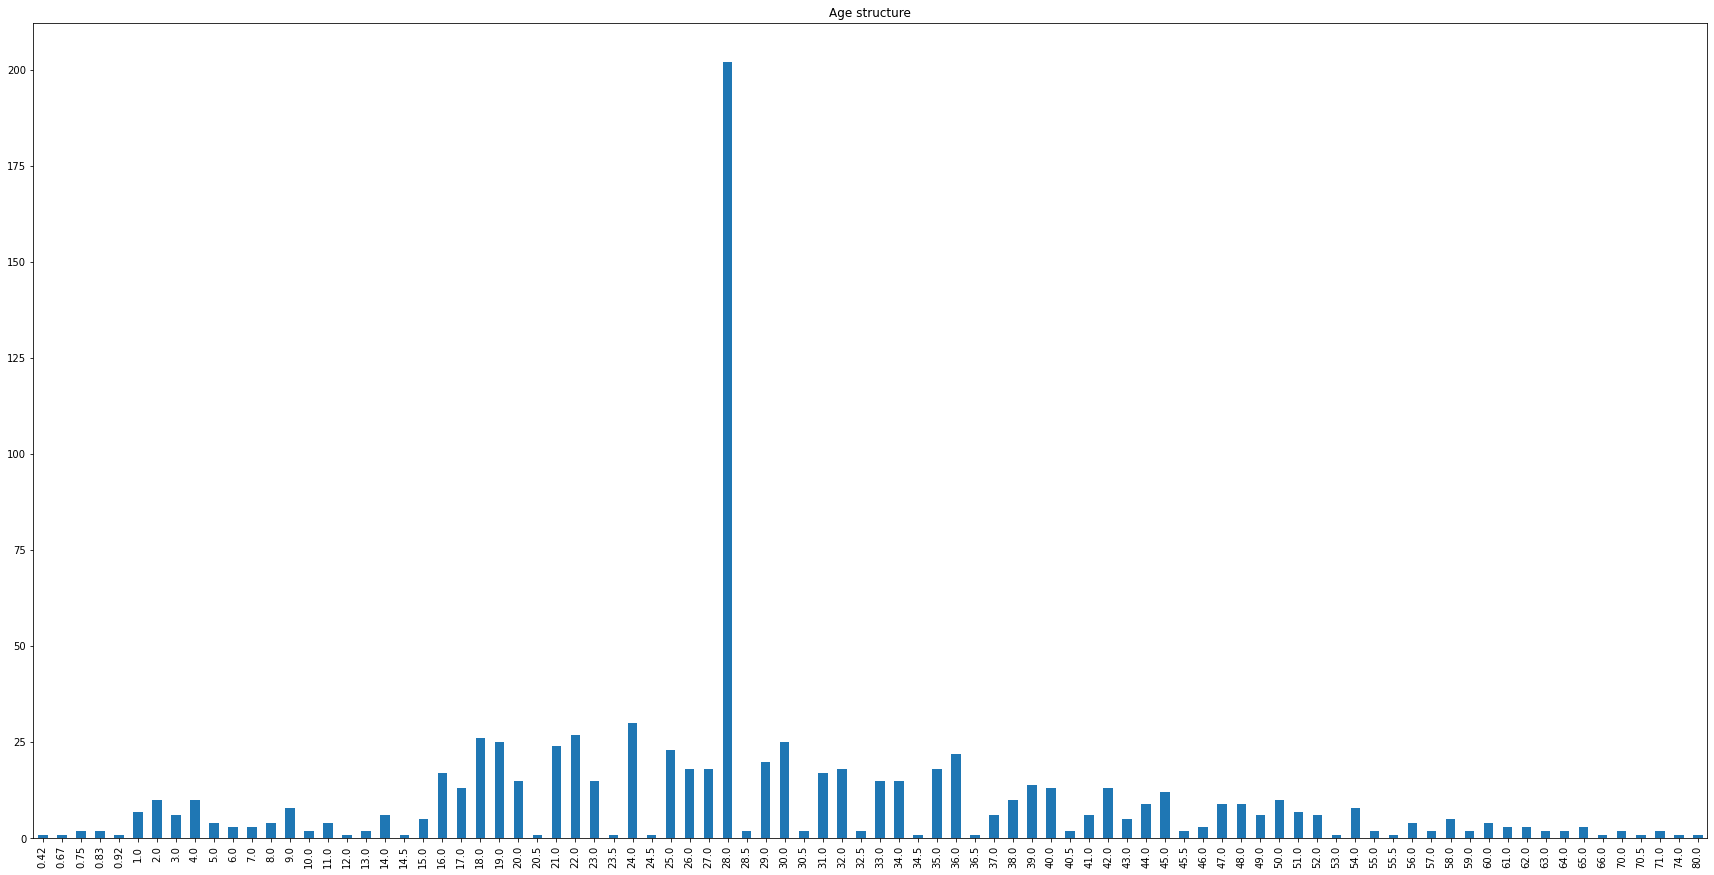

In [7]:
titanic_df['Age'].value_counts().sort_index().plot(kind='bar', figsize=(30, 15), title='Age structure');

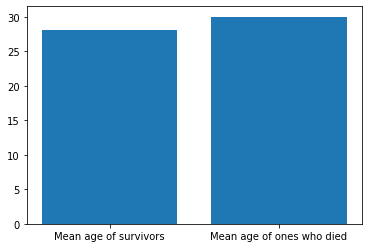

In [8]:
survived_mean = titanic_df[(titanic_df['Survived'] == 1)]['Age'].mean()
died_mean = titanic_df[(titanic_df['Survived'] == 0)]['Age'].mean()
plt.bar(x=['Mean age of survivors', 'Mean age of ones who died'], height=[survived_mean, died_mean]);

It seems that there has been a lot of NaN values in our data set, as it is doubtful that there have been so many people aged
28 - it is likely only the average acroos our passengers. Nonetheless it is useful information - on average, a substantial part
of passenger is close to 30 years old.

Surprisingly enough, there seems to be no (or a very little) difference in age beteween those people who survived and those who did not. It probably has to do with the fact that the majority of passengers was around 30 anyway.

Since our goal is to perform a logistic regression, we have to ask ourselfes whether our data isn't biased with the class majority problem. It likely is, since the name of the event is 'Titanic Disaster'

61.75% of people from data base died


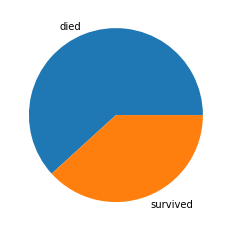

In [9]:
died, survived = titanic_df['Survived'].value_counts()
plt.pie((died, survived), labels=['died', 'survived']);
print(f'{died/(died+survived)*100:.2f}% of people from data base died')

Surprisingly enough, we don't have to worry about majority class problem, since it is roughly 60% of people that died. We do have to take that into account though - anything below 60% accuracy is worse than guessing that everybody died.

Let's perform simple logistic regression, without any weights or choosing features - just to see where we are at, at this point

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(titanic_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']], titanic_df['Survived'], test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(x_train, y_train);

print(f'Model accuracy is: {model.score(x_test, y_test)*100:.2f}%')
model.coef_

Model accuracy is: 79.03%


array([[-1.02607177e+00,  2.59485539e+00, -4.36802460e-02,
        -3.89721369e-01, -2.97873305e-02,  2.32188009e-03,
        -2.90880983e-01]])

Let's get more information about how well our model did.

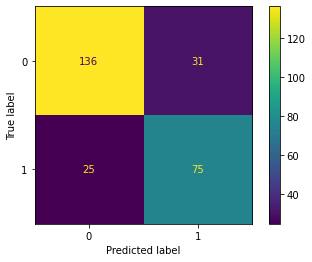

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

display = ConfusionMatrixDisplay(confusion_matrix(y_test, model.predict(x_test)))
display.plot();

Perhaps better combination of features exists, to improve our accuracy. Because of the data set being rather small, cross-validation is the way to go.

In [12]:
from sklearn.feature_selection import RFECV

feature_selection_model = RFECV(estimator=LogisticRegression())
feature_selection_model.fit(x_train, y_train)
selected_features = list(x_train.columns[feature_selection_model.support_])
print(f'Selected features are: {selected_features}')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Selected features are: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


It seems that all features are important in our data set. 
We won't get much more accuracy from this approach, so let's try a different one - let's use a decision tree.
I'll experiment with different type of split quality metrics: 'gini' and 'entropy' and also with different splitting methods, choosing between 'best' and 'random', also trying to control the tree size to prevent overfitting.

The meaning of those parameters and when each one has chance to give better results is nicely explained here
https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680

In [13]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best')
clf.fit(x_train, y_train)
print(f'Accuracy using decision tree with such tuning is {clf.score(x_test, y_test)*100:.2f}%')

Accuracy using decision tree with such tuning is 75.66%


In [14]:
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='random')
clf.fit(x_train, y_train)
print(f'Accuracy using decision tree with such tuning is {clf.score(x_test, y_test)*100:.2f}%')

Accuracy using decision tree with such tuning is 74.16%


In [15]:
clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best')
clf.fit(x_train, y_train)
print(f'Accuracy using decision tree with such tuning is {clf.score(x_test, y_test)*100:.2f}%')

Accuracy using decision tree with such tuning is 75.66%


In [16]:
clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='random')
clf.fit(x_train, y_train)
print(f'Accuracy using decision tree with such tuning is {clf.score(x_test, y_test)*100:.2f}%')

Accuracy using decision tree with such tuning is 73.41%


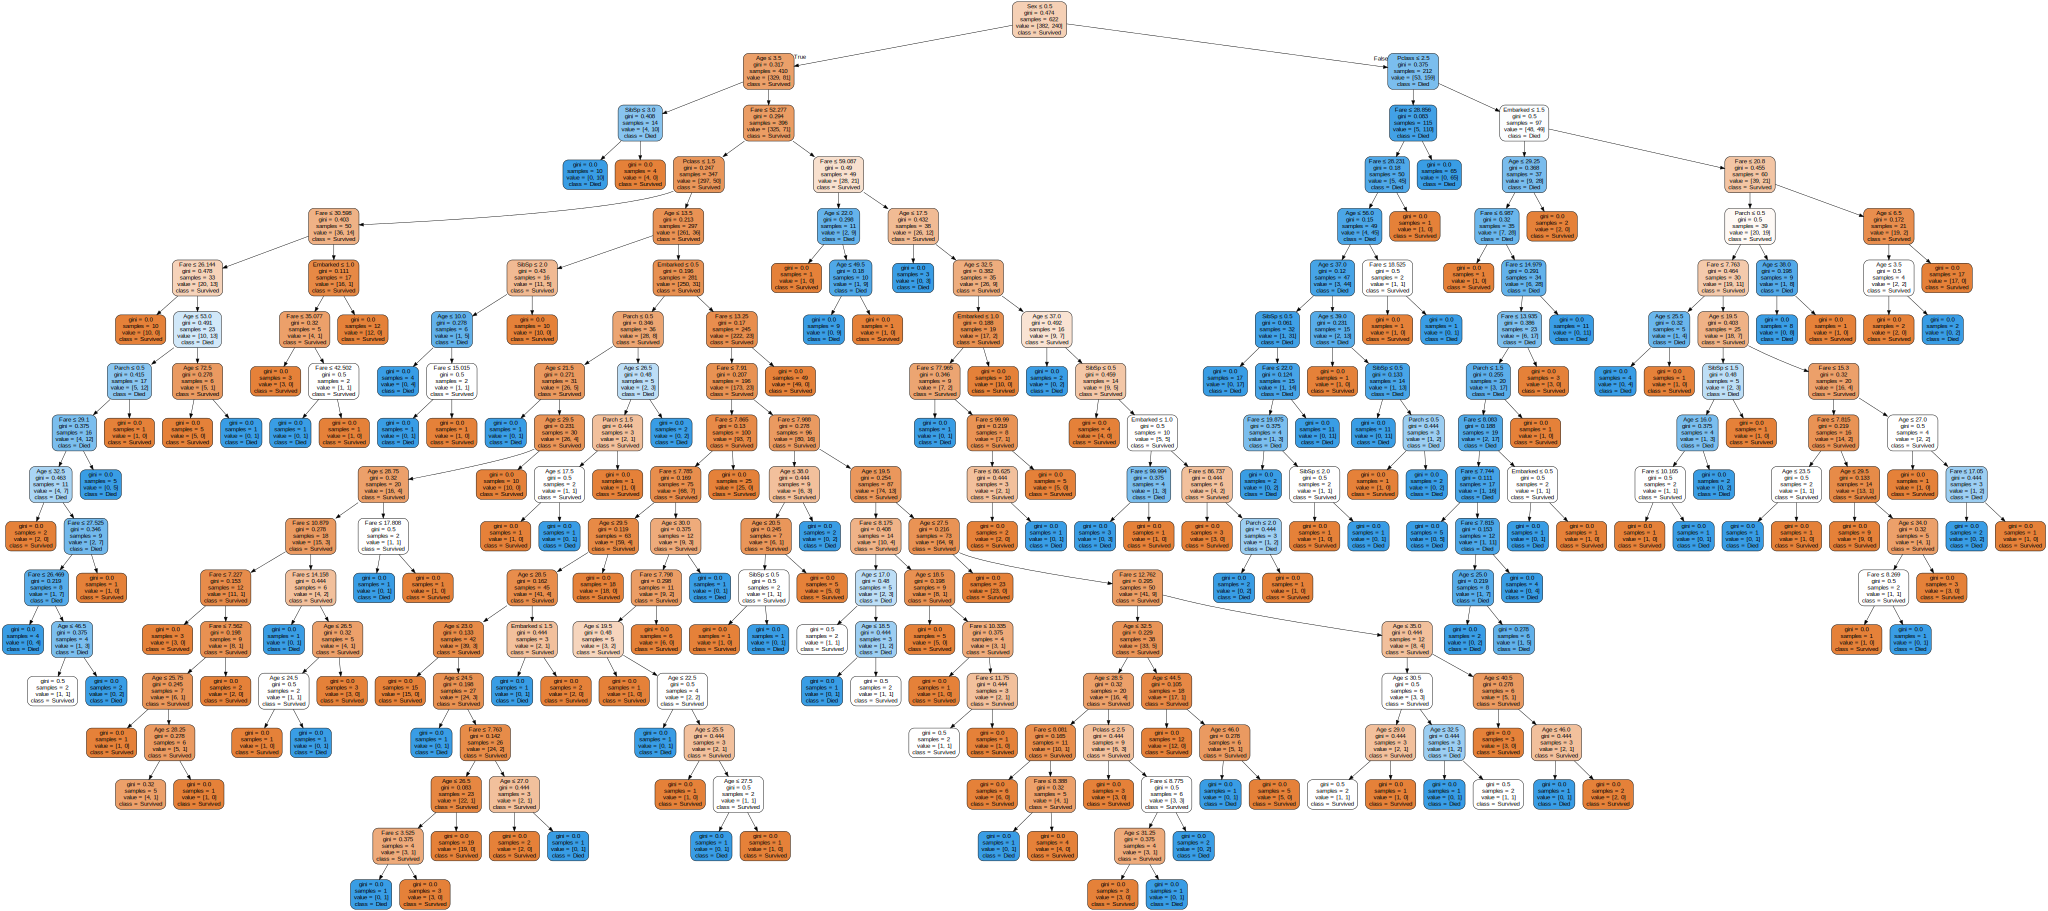

In [17]:
import graphviz 
clf = tree.DecisionTreeClassifier(criterion='gini')
clf.fit(x_train, y_train)

dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'],  
                      class_names=['Survived', 'Died'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

As we can see, the decision tree is enormous. Let's see whether putting a limit to it's depth can help us to get better results. I'll experiment with the model with the best accuracy yet.

In [18]:
clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=7)
clf.fit(x_train, y_train)
print(f'Accuracy using decision tree with such tuning is {clf.score(x_test, y_test)*100:.2f}%')

Accuracy using decision tree with such tuning is 81.65%


In [19]:
clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=3)
clf.fit(x_train, y_train)
print(f'Accuracy using decision tree with such tuning is {clf.score(x_test, y_test)*100:.2f}%')

Accuracy using decision tree with such tuning is 82.40%


Wow! Limiting tree depth made it possible to achieve accuracy of 82.4% ! That's a huge improvement. Let's see what the tree looks like now.

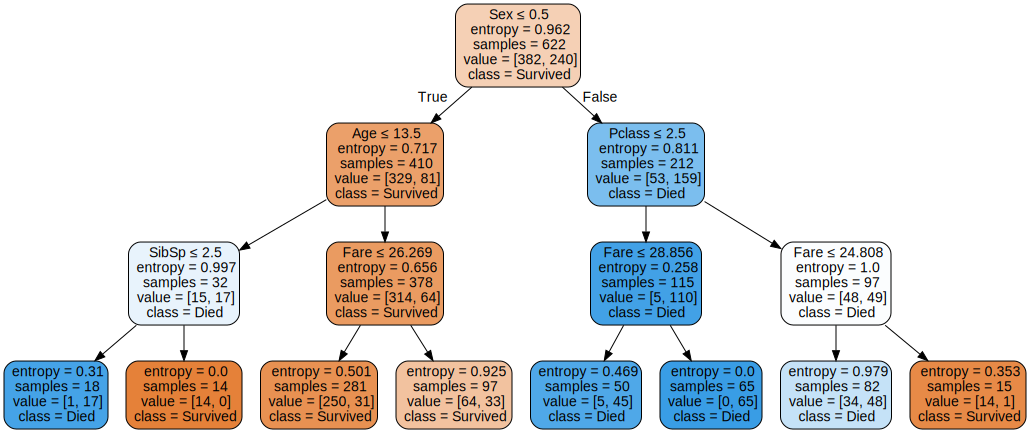

In [20]:
clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=3)
clf.fit(x_train, y_train)

dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'],  
                      class_names=['Survived', 'Died'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

The results given by decision tree are very good. The tree is simple, readable and the accuracy is the best so far.

Let's see whether using AdaBoost can beat it.

In [21]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=50, random_state=0)
clf.fit(x_train, y_train)
print(f'Accuracy using AdaBoost with such tuning is {clf.score(x_test, y_test)*100:.2f}%')

Accuracy using AdaBoost with such tuning is 80.15%


In [22]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)
print(f'Accuracy using AdaBoost with such tuning is {clf.score(x_test, y_test)*100:.2f}%')

Accuracy using AdaBoost with such tuning is 81.27%


In [23]:
clf = AdaBoostClassifier(n_estimators=200, random_state=0)
clf.fit(x_train, y_train)
print(f'Accuracy using AdaBoost with such tuning is {clf.score(x_test, y_test)*100:.2f}%')

Accuracy using AdaBoost with such tuning is 82.77%


Better than a decision tree! Let's keep going, perhaps we can reach some even better accuracy.

In [24]:
est = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=3)

clf = AdaBoostClassifier(base_estimator=est, n_estimators=200, random_state=0)
clf.fit(x_train, y_train)
print(f'Accuracy using AdaBoost with such tuning is {clf.score(x_test, y_test)*100:.2f}%')

Accuracy using AdaBoost with such tuning is 76.40%


In [25]:
est = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=3)

clf = AdaBoostClassifier(base_estimator=est, n_estimators=100, random_state=0)
clf.fit(x_train, y_train)
print(f'Accuracy using AdaBoost with such tuning is {clf.score(x_test, y_test)*100:.2f}%')

Accuracy using AdaBoost with such tuning is 77.53%


In [26]:
est = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=3)

clf = AdaBoostClassifier(base_estimator=est, n_estimators=1, random_state=0)
clf.fit(x_train, y_train)
print(f'Accuracy using AdaBoost with such tuning is {clf.score(x_test, y_test)*100:.2f}%')

Accuracy using AdaBoost with such tuning is 82.40%


After doing quick research on the internet I've found out that it is rarely the case that we want to change base estimator parameter and that the algorithm often performs best when base estimator is left at the default value.

The best accuracy I have been able to accomplish on given data set, with relatively small data set is <b>82.77%</b> and that has been achieved using <b> AdaBoost Classifier </b> with 200 estimators, which is a noticible improvement from the initial 79% achieved by simple logistic regression and neglibile difference between 82.40% achieved by decision tree.